In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings("ignore")


In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [5]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]



# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 1) Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?

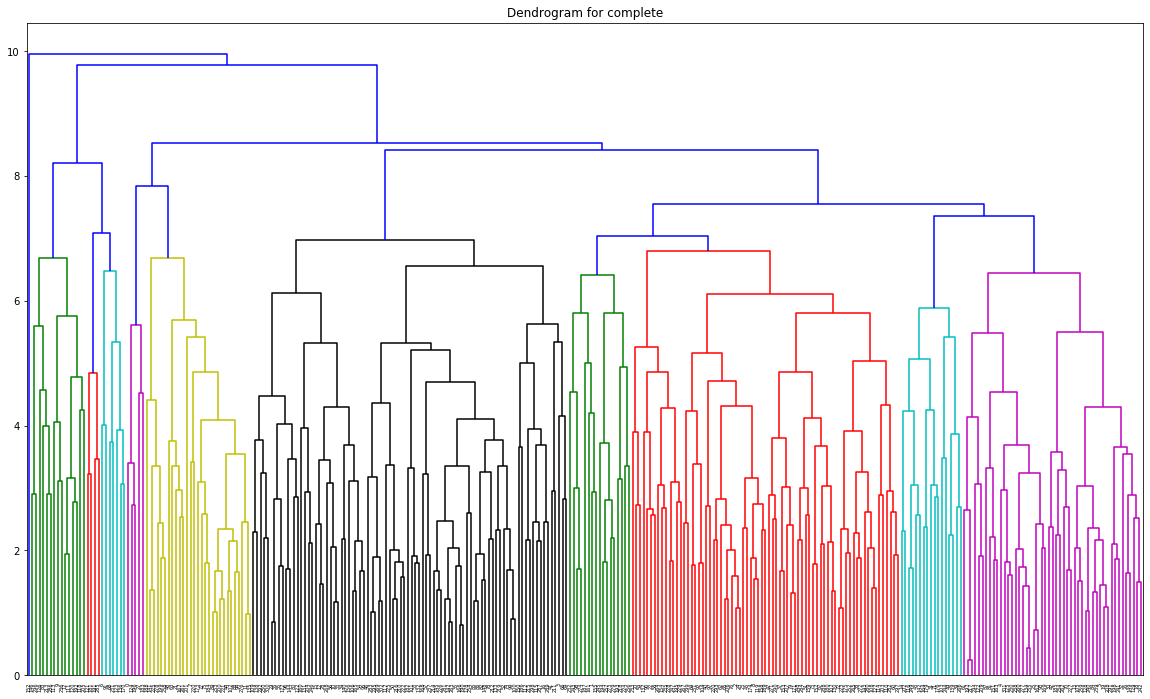

In [6]:
plt.figure(figsize=(20,12))
plt.title("Dendrogram for complete")
dendrogram(linkage(X_std, method='complete'))
plt.show()

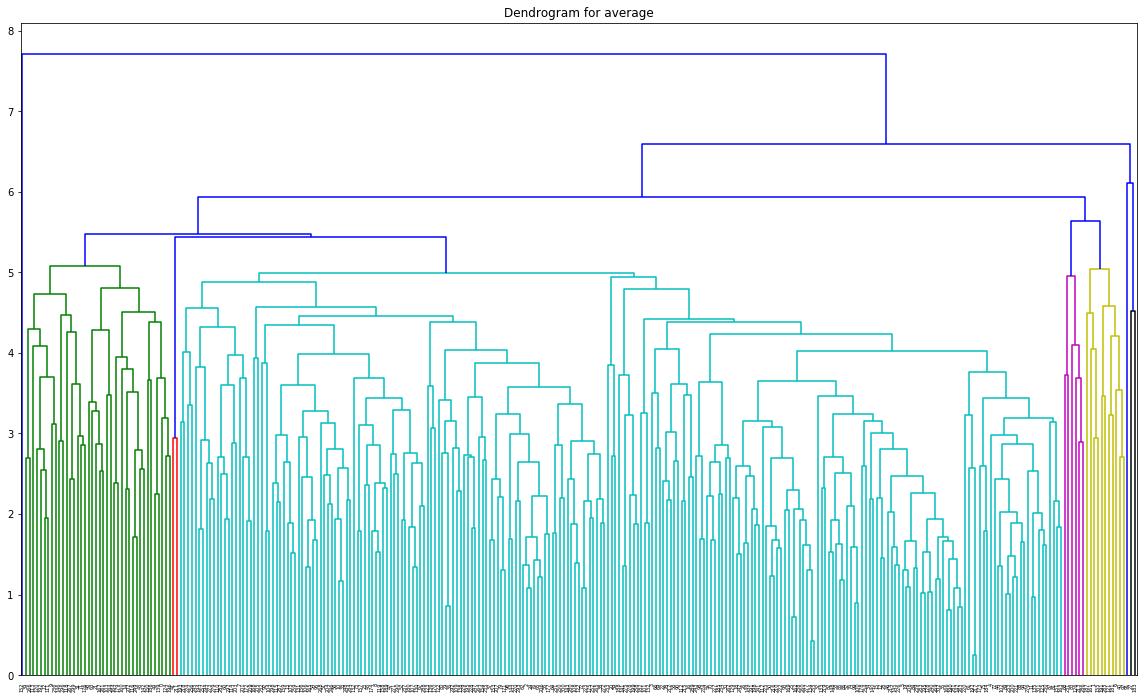

In [7]:
plt.figure(figsize=(20,12))
plt.title("Dendrogram for average")
dendrogram(linkage(X_std, method='average'))
plt.show()


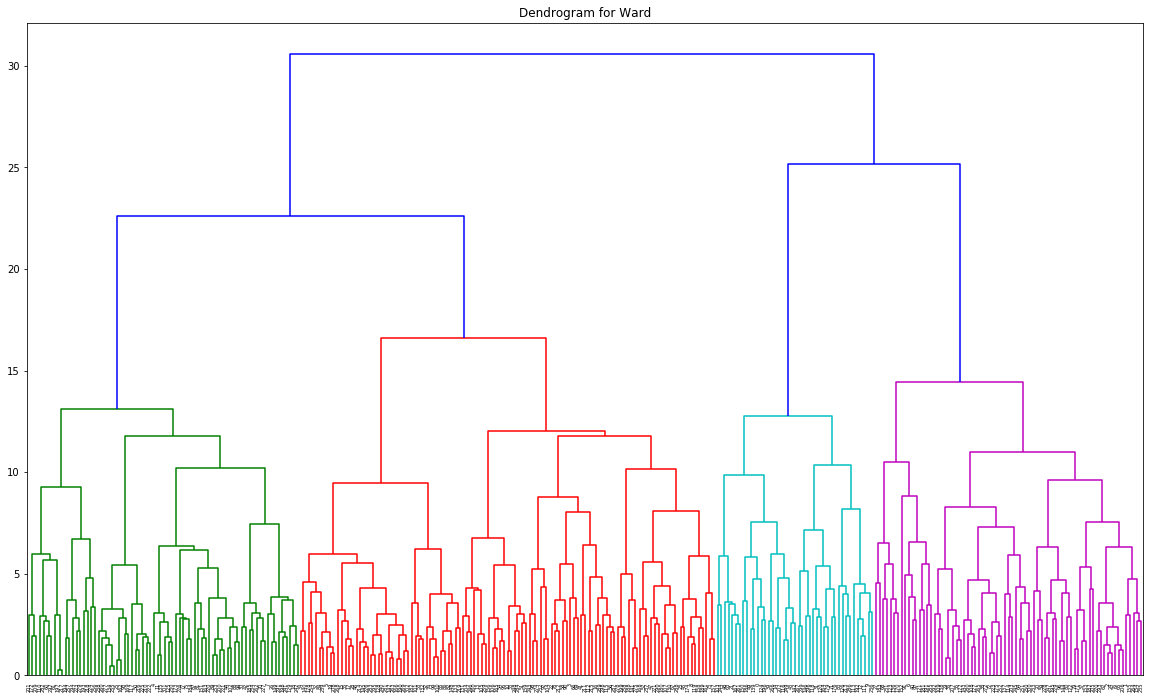

In [8]:
plt.figure(figsize=(20,12))
plt.title("Dendrogram for Ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()

Ward is more dendrogram is more pleaseing to the eyes, and easier to read. Dendrogram complete and average are difficult to read and looks very confusing and much difficult to follow.

# 1) Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?

In [9]:
#Defining the agglomerative clustering
agg_complete = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_complete.fit_predict(X_std)

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score of linkage method complete: 0.21394030618551016
Silhouette score of linkage method complete: 0.11730765444448985


In [10]:

 # Defining the agglomerative clustering
average_agg = AgglomerativeClustering(linkage="average", 
                                       affinity='cosine',
                                       n_clusters=2)
# Fit model
 clusters = average_agg.fit_predict(X_std)

print("ARI score of linkage method average: {}".format(
     metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score of linkage method average: 0.2940490133353465
Silhouette score of linkage method average: 0.14837359969689895


In [11]:
#Defining the agglomerative clustering
ward_agg = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = ward_agg.fit_predict(X_std)

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))


ARI score of linkage method ward: 0.146129913123814
Silhouette score of linkage method ward: 0.1387197366557222


So far our best scores are for linkage methode average. The ARI and silhouette scores of the two cluster k-means solution was 0.44 and 0.17. According to ARI the best model goes to our k-means method, however, but when it comes to the silhouette score the winner is agglomerative clustering.